# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
x_values =[17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values =[10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

students = pd.DataFrame({'X': x_values, 'Y': y_values}).reset_index()
students.head()

,index,X,Y
0,0,17,10
1,1,51,1
2,2,27,5
3,3,21,9
4,4,36,4


In [3]:
# students.rename(columns={'index':'studentId', 'X': 'age', 'Y': 'tardies'})

Draw a dispersion diagram (scatter plot) for the data.

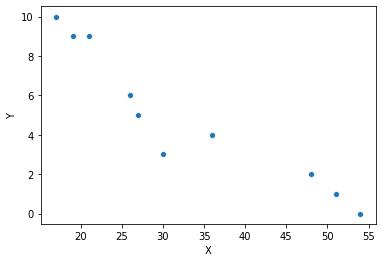

In [4]:
# plt.scatter('Age', 'Tardies', data=student_data) sns.set()
ax = sns.scatterplot('X', 'Y', data=students)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
"""
The variables have a negative linear association. That is, the older the student, the lower the number of delays.
"""

'\nThe variables have a negative linear association. That is, the older the student, the lower the number of delays.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

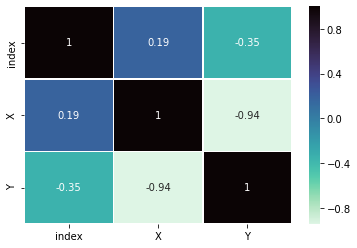

In [6]:
# Correlation:
correlation = students.corr()
sns.heatmap(correlation, annot=True, linewidths=.5, cmap="mako_r")

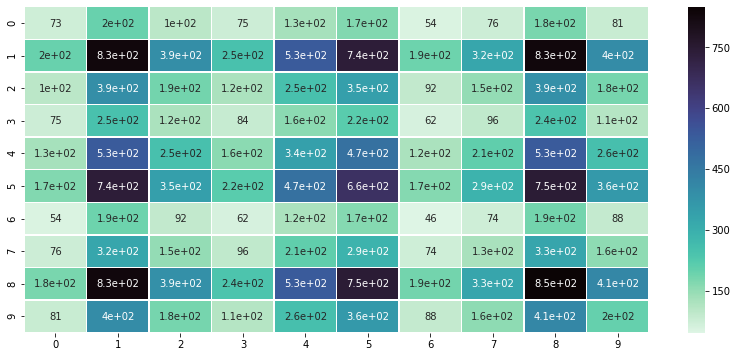

In [7]:
# Covariance:
plt.figure(figsize=(14,6))
covariance = np.cov(students)
sns.heatmap(covariance, annot = True, linewidths=.5, cmap="mako_r")

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
x = students['X'] # independent variable
y = students['Y'] # dependent variable


# perform a linear regression on these two variables 

results = stats.linregress(x,y)

results

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

Plot your regression model on your scatter plot.

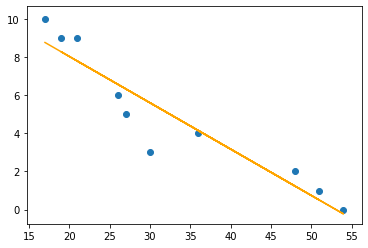

In [9]:
# below is the result of my linear regression
regression_line = results[1] + results[0]*x

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
"""
We can see the negative linear association between the variables.
That is, the older the student, the lower the number of delays.
"""

'\nWe can see the negative linear association between the variables.\nThat is, the older the student, the lower the number of delays.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
cars = pd.read_csv('vehicles.csv')
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
cars.columns
cars_vars = cars[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
cars_vars.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


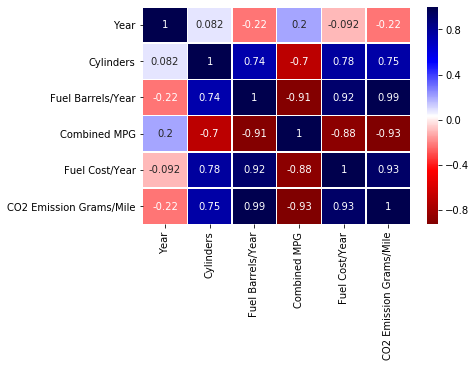

In [13]:
# Pearson Correlation
correlations = cars_vars.corr()
sns.heatmap(correlations, annot=True, linewidths=.5, cmap="seismic_r")
plt.show()

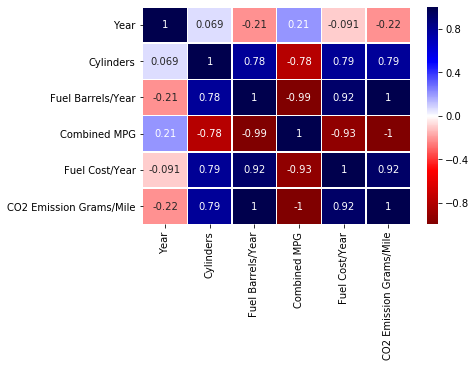

In [14]:
# Pearson Correlation
correlations = cars_vars.corr('spearman')
sns.heatmap(correlations, annot=True, linewidths=.5, cmap="seismic_r")
plt.show()

#### Which variable do you think will be the most important in determining CO2 emissions?

In [15]:
# Fuel cost/ year, Fuel Barrels/Year, Cylinders (+)
# Combined MPG (-)

#### Which provides the least amount of helpful information for determining CO2 emissions? 

In [16]:
# Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

### Regression model for Fuel Barrels

In [17]:
import statsmodels.api as sm

x = cars_vars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = cars_vars['CO2 Emission Grams/Mile']

x = sm.add_constant(x)
model = sm.OLS(y,x)
model = model.fit()
predictions = model.predict(x)

# Using OLS Regression model

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
model.summary()
# p value significancia estatistica
# R qual o desvio medio em termos relativos entre o modelos e os pontos, 1 é perfeito, 0 o modelo não explica de todo

# 2] The condition number is large, 6.2e+05. 
# This might indicate that there are strong multicollinearity or other numerical problems.
# Multicollinearity  maybe  could be a problem to machine learning modelling: overfitting problems.

# R squared: erro


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                             20:13:31   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. 

In [25]:
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                             20:16:48   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

What are the most important varibles in your model and why?

In [ ]:
"""
Fuel Barrels/Year  because it has the best correlation with CO2 emissions (1), 
and the highest coefficient(19.0529) and t value(311.600) in the equation  """

What conclusions can you draw from your model and how confident in these conclusions are you? 

In [27]:
"""
The model has a great R squared value (0.98), wich means that 98.1 %  of the response variable( CO2 emissions) variation is explained by  the model.
The F-statistic and its p-value <0.001 basically show us that this model is statistically valid. So we can admit that the model is reliable.
"""

'\nThe model has a great R squared value (0.98), wich means that 98.1 %  of the response variable( CO2 emissions) variation is explained by  the model.\nThe F-statistic and its p-value <0.001 basically show us that this model is statistically valid. So we can admit that the model is reliable.\n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [29]:
x_values =[1,3,4,6,8,9,11,14]
y_values =[1,2,4,4,5,7,8,13]

guests = pd.DataFrame({'invited': x_values, 'attended': y_values})
guests.head()

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

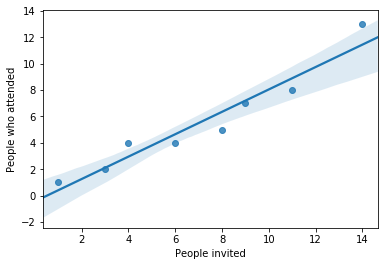

In [34]:
# Hypothesis = 'the more people I invite the more people are unable to attend. '
sns.regplot(x='invited', y='attended', data=guests)
plt.xlabel('People invited')
plt.ylabel('People who attended')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [35]:
"""
it seems to contradict the hypothesis, there is a positive linear association between the variables,
that is, the number of people who attend increases according to the number of people invited.
"""

'\nit seems to contradict the hypothesis, there is a positive linear association between the variables,\nthat is, the number of people who attend increases according to the number of people invited.\n'

In [47]:
x = guests['invited']
y = guests['attended']

model = sm.OLS(y,x)
model = model.fit()
prediction = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               attended   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              320.2
Date:                Mon, 04 May 2020   Prob (F-statistic):                    4.20e-07
Time:                        23:38:41   Log-Likelihood:                         -11.017
No. Observations:                   8   AIC:                                      24.03
Df Residuals:                       7   BIC:                                      24.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
invited        0.8015      0.045     17.895      0.000       0.696       0.907
==============================================================================
Omnibus:                        1.458   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.655
Skew:                           0.664   Prob(JB):                        0.721
Kurtosis:                       2.547   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data?

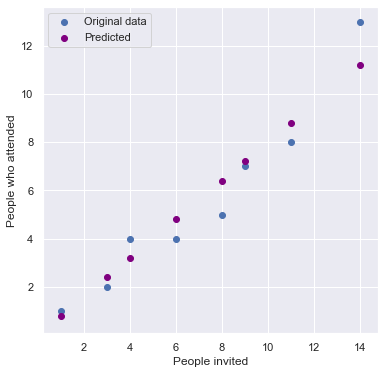

In [59]:
# PLOT
sns.set()
#FigSize
plt.figure(figsize=(6,6))
#plots
plt.scatter(x, y, label='Original data')
plt.scatter(x, prediction, color='purple', label='Predicted')
#Labels
plt.xlabel('People invited')
plt.ylabel('People who attended')
#Legend
plt.legend()

 Remove these points and recalculate your regression. 
    Print the new dispersion diagram with your new model and the results of your model. 

In [62]:
x_values =[1,3,4,6,8,9,11]
y_values =[1,2,4,4,5,7,8]

guests = pd.DataFrame({'invited': x_values, 'attended': y_values})

x = guests['invited']
y = guests['attended']

model = sm.OLS(y,x)
model = model.fit()
prediction = model.predict(x)
model.summary()

C:\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               attended   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              449.6
Date:                Mon, 04 May 2020   Prob (F-statistic):                    7.18e-07
Time:                        23:46:30   Log-Likelihood:                         -6.0445
No. Observations:                   7   AIC:                                      14.09
Df Residuals:                       6   BIC:                                      14.03
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
invited        0.7256      0.034     21.203      0.000       0.642       0.809
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.588
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.199
Skew:                           0.282   Prob(JB):                        0.905
Kurtosis:                       2.395   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

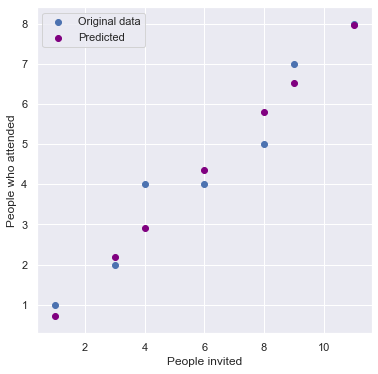

In [63]:
# PLOT
sns.set()
#FigSize
plt.figure(figsize=(6,6))
#plots
plt.scatter(x, y, label='Original data')
plt.scatter(x, prediction, color='purple', label='Predicted')
#Labels
plt.xlabel('People invited')
plt.ylabel('People who attended')
#Legend
plt.legend()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [24]:
"""
Removing the outlier, we can improve the R2 value, that is, now the accuracy of our model is slightly better.
"""